In [1]:
class Accumulator:
    def __init__(self,n):
        data=[0.0]*n
    def add(self,*args):
        self.data=[a+float(b) for a,b in zip(self.data,args)]
    def clear(self):
        self.data=[0.0]*(len(self.data))
    #方便该类可以通过下标方式访问,如a[1]
    def __getitem_(self,i):
        return self.data[i]

In [ ]:
import torch
from torch.utils import data
import torchvision
import torchvision.transforms as transforms

def get_data_fashion_mnist(batch_size,loaders,resize=None):
    trans=[transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)
    mnist_train=torchvision.datasets.FashionMNIST(
        root='../data',train=True,download=True)
    mnist_test=torchvision.datasets.FashionMNIST(
        root='../data',train=False,download=True)
    return (data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=loaders)), \
           (data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=loaders)) 
    

In [ ]:
import torch
from torch import nn

def getAccuracy(y_hat,y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())/y.shape[0]

In [ ]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(getAccuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

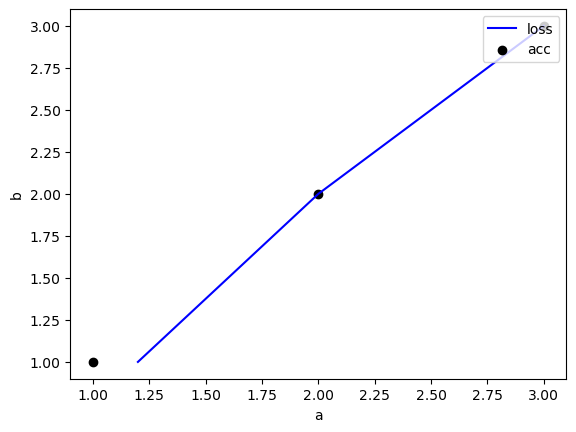

In [1]:
import matplotlib.pyplot as plt
class Graph:
    def __init__(self,xlabel,ylabel):
        self.fig=plt.figure()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    def addLine(self,x,y,color='black'):
        plt.plot(x,y,color=color)
    def addScatter(self,x,y,color='black'):
        plt.scatter(x,y,color=color)
    def addLegend(self,list,loc='upper right'):
        plt.legend(list,loc=loc)
    def show(self):
        plt.show()
g=Graph('a','b')
g.addLine([1.2,2,3],[1,2,3],'blue')
g.addScatter([1,2,3],[1,2,3])
g.addLegend(['loss','acc'])
g.show()